<div style="border-width: medium; border-style: solid;border-color: black; padding: 10px;"> 
<img src="https://logodownload.org/wp-content/uploads/2015/05/uber-logo-1-1.png" style="float: right;" width=100px><br>
<h2 style="line-height: 0.7; ">TP2 de IBD</h2> 
<p style="line-height: 0.7;"> Professora: Mirella M. Moro</p>
<p style="line-height: 0.7;"> Alunos: Gabriel Henrique Santos Dias & Victor Hugo Faria Dias Magalhães</p>
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Logo_UFMG.png" style="float: right;" width=100px></h4>
<br>
<p>Notebook feito utilizando Python 3.7 no Ubuntu 18.04 LTS. </p>
</div>

In [47]:
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output

In [10]:
conn = sqlite3.connect('./tp2')
cursor = conn.cursor()

In [51]:
print("ESCREVA A CONSULTA INTERATIVA")

outp = widgets.Output()
button = widgets.Button(description="Click Me!")
text = widgets.Text(
    value='',
    placeholder='Consulta',
    description='Digite sua consulta:',
    disabled=False
)

def callback(wdgt):
    global consulta
    consulta = wdgt.value

def on_button_clicked(b):
    df = pd.read_sql_query(consulta, conn)
    with outp:
        clear_output()
        display(df)


button.on_click(on_button_clicked)
text.on_submit(callback)

display(text, button, outp)

ESCREVA A CONSULTA INTERATIVA


Text(value='', description='Digite sua consulta:', placeholder='Consulta')

Button(description='Click Me!', style=ButtonStyle())

Output()

In [3]:
print("Consulta básica 1: Projeção: Todos os nomes de zonas da cidade de São Paulo")
df = pd.read_sql_query(
"select zone_name as Nomes_São_Paulo "+
"from sao_paulo_names",conn)
df

Consulta básica 1: Projeção: Todos os nomes de zonas da cidade de São Paulo


,Nomes_São_Paulo
0,Sé
1,Parque Dom Pedro
2,Praça João Mendes
3,Ladeira da Memória
4,República
...,...
512,Quatro Encruzilhadas
513,Itapevi
514,Amador Bueno
515,Santana de Parnaíba


In [4]:
print("Consulta básica 2: Projeção e Seleção: Viagens cuja origem é o bairro da Sé em SP")
df = pd.read_sql_query(
"select H.hod as Horário, S.zone_name as Nome_zona "+
"from sao_paulo_hourly as H join sao_paulo_names as S on H.sourceid = S.zone_id "+
"where Nome_zona = \"Sé\"",conn)
df

Consulta básica 2: Projeção e Seleção: Viagens cuja origem é o bairro da Sé em SP


,Horário,Nome_zona
0,0,Sé
1,0,Sé
2,0,Sé
3,0,Sé
4,0,Sé
...,...,...
10649,23,Sé
10650,23,Sé
10651,23,Sé
10652,23,Sé


In [5]:
print("Consulta básica 3: Junção de duas relações: 20 viagens mais demoradas de Manchester")
print("Tempo Médio em Minutos!")
df = pd.read_sql_query(
"select W.hod as Horário, N.zone_name as Zona_Origem, M.zone_name as Zona_Destino, mean_travel_time/60 as Tempo_Medio "+
"from manchester_hourly as W "+
"LEFT JOIN manchester_names as N ON W.sourceid = N.zone_id "+
"LEFT JOIN manchester_names as M ON W.dstid = M.zone_id "+
"order by Tempo_Medio desc limit 20",conn)
df

Consulta básica 3: Junção de duas relações: 20 viagens mais demoradas de Manchester
Tempo Médio em Minutos!


,Horário,Zona_Origem,Zona_Destino,Tempo_Medio
0,18,Manchester 030,Trafford 019,77.725000
1,16,Manchester 053,Bury 026,69.316667
2,20,Manchester 025,Salford 003,66.714833
3,19,Manchester 028,Salford 006,65.723833
4,14,Stockport 024,Manchester 060,65.308333
5,21,Manchester 026,Oldham 014,64.683333
6,20,Manchester 020,Salford 014,63.583333
7,16,Manchester 053,Rochdale 013,61.931500
8,20,Manchester 025,Bolton 034,59.640500
9,16,Manchester 053,Salford 010,58.940667


In [6]:
print("Consulta básica 4: Junção de duas relações: 20 viagens mais rápidas de Joanesburgo")
print("Tempo Médio em Minutos!")
df = pd.read_sql_query(
"select W.hod as Horário, N.zone_name as Zona_Origem, M.zone_name as Zona_Destino, mean_travel_time/60 as Tempo_Medio "+
"from johannesburg_hourly as W "+
"LEFT JOIN johannesburg_names as N ON W.sourceid = N.zone_id "+
"LEFT JOIN johannesburg_names as M ON W.dstid = M.zone_id "+
"order by Tempo_Medio asc limit 20",conn)
df

Consulta básica 4: Junção de duas relações: 20 viagens mais rápidas de Joanesburgo
Tempo Médio em Minutos!


,Horário,Zona_Origem,Zona_Destino,Tempo_Medio
0,19,"0 Montgomery Street\, Vereeniging","Lager Street\, Leeuwkuil\, Vereeniging",0.219000
1,14,"0 Maunde Street\, Elandsfontein 352-Jr\, Pretoria","Avenue\, Elandsfontein 352-Jr",0.297667
2,16,"0 Montgomery Street\, Vereeniging","Lager Street\, Leeuwkuil\, Vereeniging",0.316667
3,7,"Unnamed Road\, Eikenhof","Vereeniging Road\, Vereeniging NU\, Alberton",0.321167
4,22,"Unnamed Road\, Eikenhof","Vereeniging Road\, Vereeniging NU\, Alberton",0.323833
5,3,"23rd Street\, Pretoria\, Gauteng\, South Africa","0 Sterkfontein Avenue\, Pretoria\, Gauteng\, S...",0.359500
6,4,"100 Main Reef Road\, Amalgam\, Johannesburg","0 Booysens Station\, Stafford\, Johannesburg",0.368167
7,4,"Unnamed Road\, Kempton Park NU\, Kempton Park","0 Corona Place\, Sedibeng\, Tembisa",0.376000
8,18,"0 Montgomery Street\, Vereeniging","Lager Street\, Leeuwkuil\, Vereeniging",0.380833
9,5,"View Road\, Northern Farm","Unnamed Road\, West Rand\, Gauteng\, South Africa",0.387833


In [7]:
print("Consulta básica 5: Junção de duas relações: Viagens cuja origem é a Sé e o destino é a Vila São Pedro")
df = pd.read_sql_query(
"select W.hod as Horário, N.zone_name as Zona_Origem, M.zone_name as Zona_Destino, mean_travel_time/60 as Tempo_Medio "+
"from sao_paulo_hourly as W "+
"LEFT JOIN sao_paulo_names as N ON W.sourceid = N.zone_id "+
"LEFT JOIN sao_paulo_names as M ON W.dstid = M.zone_id "+
"where Zona_Origem = \"Sé\" and Zona_Destino = \"Vila São Pedro\"",conn)
df

Consulta básica 5: Junção de duas relações: Viagens cuja origem é a Sé e o destino é a Vila São Pedro


,Horário,Zona_Origem,Zona_Destino,Tempo_Medio
0,0,Sé,Vila São Pedro,20.889000
1,1,Sé,Vila São Pedro,19.387167
2,2,Sé,Vila São Pedro,20.885167
3,3,Sé,Vila São Pedro,19.855667
4,4,Sé,Vila São Pedro,21.437500
5,5,Sé,Vila São Pedro,20.669000
6,6,Sé,Vila São Pedro,23.485333
7,7,Sé,Vila São Pedro,29.047833
8,8,Sé,Vila São Pedro,32.688000
9,9,Sé,Vila São Pedro,32.764667


In [8]:
print("Consulta básica 6: Junção de três relações: Retornar os 10 primeiros ID's e os nomes de 3 cidades!")
df = pd.read_sql_query(
    "select S.zone_name as SP_zone, M.zone_name as Manchester_zone, C.zone_name as Cairo_zone, S.zone_id as ID "+
    "from sao_paulo_names as S " +
    "join manchester_names as M on S.zone_id = M.zone_id "+
    "join cairo_names as C on M.zone_id = C.zone_id "+
    "order by ID asc limit 10", conn)
df

Consulta básica 6: Junção de três relações: Retornar os 10 primeiros ID's e os nomes de 3 cidades!


,SP_zone,Manchester_zone,Cairo_zone,ID
0,Sé,Manchester 020,Unnamed Road,1
1,Lapa,Salford 018,300 Street 15,100
2,Vila Ipojuca,Salford 019,Unnamed Road,101
3,Alto da Lapa,Salford 020,شارع مسجد أبو يوسف، Mazghounah,102
4,Gavião Peixoto,Salford 021,0 Al Arbaaon,103
5,Bela Aliança,Salford 022,Mansheit Al Bagour - Shebein Al Kanater,104
6,Vila Hamburguesa,Salford 023,Abd El-Aziz Sallam,105
7,CEASA,Salford 024,Unnamed Road,106
8,Vila Leopoldina,Salford 025,26th of July Corridor,107
9,Emissário,Salford 026,Unnamed Road,108


In [9]:
print("Consulta básica 7: Junção de três relações: Médias de tempo de viagem de todas as cidades!")
print("Tempo médio em minutos!")
df = pd.read_sql_query(
    "select S.media as SP_media, M.media as Manchester_media, C.media as Cairo_media, J.media as Johannesburg_media "+
    "from (select avg(mean_travel_time)/60 as media from sao_paulo_hourly) as S join "+
    "(select avg(mean_travel_time)/60 as media from manchester_hourly) as M join"+
    "(select avg(mean_travel_time)/60 as media from cairo_hourly) as C join "+
    "(select avg(mean_travel_time)/60 as media from johannesburg_hourly) as J", conn)
df

Consulta básica 7: Junção de três relações: Médias de tempo de viagem de todas as cidades!
Tempo médio em minutos!


,SP_media,Manchester_media,Cairo_media,Johannesburg_media
0,34.778021,14.501107,33.867151,20.844861


In [10]:
print("Consulta básica 8: Junção de três relações: Menor de tempo de viagem de todas as cidades!")
print("Tempo médio em segundos!")
df = pd.read_sql_query(
    "select S.minimo as SP_minimo, M.minimo as Manchester_minimo, C.minimo as Cairo_minimo, J.minimo as Johannesburg_minimo "+
    "from (select min(mean_travel_time) as minimo from sao_paulo_hourly) as S join "+
    "(select min(mean_travel_time) as minimo from manchester_hourly) as M join"+
    "(select min(mean_travel_time) as minimo from cairo_hourly) as C join "+
    "(select min(mean_travel_time) as minimo from johannesburg_hourly) as J", conn)
df

Consulta básica 8: Junção de três relações: Menor de tempo de viagem de todas as cidades!
Tempo médio em segundos!


,SP_minimo,Manchester_minimo,Cairo_minimo,Johannesburg_minimo
0,33.67,30.26,6.43,13.14


In [11]:
print("Consulta básica 9: Junção de duas relações e agregação: Tempo médio diário entre Al Waresh e Kornish Al Nile")
print("Tempo médio em minutos!")
df = pd.read_sql_query(
"select N.zone_name as Zona_Origem, M.zone_name as Zona_Destino, avg(mean_travel_time)/60 as Tempo_Medio "+
"from cairo_hourly as W "+
"LEFT JOIN cairo_names as N ON W.sourceid = N.zone_id "+
"LEFT JOIN cairo_names as M ON W.dstid = M.zone_id "+
"where Zona_Origem = \"Al Waresh\" and Zona_Destino = \"Kornish Al Nile\"", conn)
df

Consulta básica 9: Junção de duas relações e agregação: Tempo médio diário entre Al Waresh e Kornish Al Nile
Tempo médio em minutos!


,Zona_Origem,Zona_Destino,Tempo_Medio
0,Al Waresh,Kornish Al Nile,36.743067


In [12]:
print("Consulta básica 10: Junção de duas relações e agregação: Maior tempo médio entre dois pontos de SP")
print("Tempo médio em minutos!")
df = pd.read_sql_query(
"select W.hod as Horário, N.zone_name as Zona_Origem, M.zone_name as Zona_Destino, max(mean_travel_time)/60 as Tempo_Máximo "+
"from sao_paulo_hourly as W "+
"LEFT JOIN sao_paulo_names as N ON W.sourceid = N.zone_id "+
"LEFT JOIN sao_paulo_names as M ON W.dstid = M.zone_id ", conn)
df

Consulta básica 10: Junção de duas relações e agregação: Maior tempo médio entre dois pontos de SP
Tempo médio em minutos!


,Horário,Zona_Origem,Zona_Destino,Tempo_Máximo
0,21,Aeroporto,Aeroporto,171.604167


In [13]:
print("Consulta Avançada 1: Relatório: Tempo médio das cidades agrupado pela manhã")
print("Tempo médio em minutos!")
df = pd.read_sql_query(
    "select S.media as SP_media, M.media as Manchester_media, C.media as Cairo_media, J.media as Johannesburg_media "+
    "from (select avg(mean_travel_time)/60 as media from sao_paulo_hourly where hod in (4,5,6,7,8,9,10,11)) as S join "+
    "(select avg(mean_travel_time)/60 as media from manchester_hourly where hod in (4,5,6,7,8,9,10,11)) as M join"+
    "(select avg(mean_travel_time)/60 as media from cairo_hourly where hod in (4,5,6,7,8,9,10,11)) as C join "+
    "(select avg(mean_travel_time)/60 as media from johannesburg_hourly where hod in (4,5,6,7,8,9,10,11)) as J", conn)
df

Consulta Avançada 1: Relatório: Tempo médio das cidades agrupado pela manhã
Tempo médio em minutos!


,SP_media,Manchester_media,Cairo_media,Johannesburg_media
0,35.366365,14.105854,31.293767,20.982879


In [16]:
print("Consulta Avançada 2: Relatório: Tempo médio das cidades agrupado pela tarde")
print("Tempo médio em minutos!")
df = pd.read_sql_query(
    "select S.media as SP_media, M.media as Manchester_media, C.media as Cairo_media, J.media as Johannesburg_media "+
    "from (select avg(mean_travel_time)/60 as media from sao_paulo_hourly where hod in (12,13,14,15,16,17,18,19)) as S join "+
    "(select avg(mean_travel_time)/60 as media from manchester_hourly where hod in (12,13,14,15,16,17,18,19)) as M join"+
    "(select avg(mean_travel_time)/60 as media from cairo_hourly where hod in (12,13,14,15,16,17,18,19)) as C join "+
    "(select avg(mean_travel_time)/60 as media from johannesburg_hourly where hod in (12,13,14,15,16,17,18,19)) as J", conn)
df

Consulta Avançada 2: Relatório: Tempo médio das cidades agrupado pela tarde
Tempo médio em minutos!


,SP_media,Manchester_media,Cairo_media,Johannesburg_media
0,39.861027,16.168083,37.325965,22.451022


In [15]:
print("Consulta Avançada 3: Relatório: Tempo médio das cidades agrupado pela noite")
print("Tempo médio em minutos!")
df = pd.read_sql_query(
    "select S.media as SP_media, M.media as Manchester_media, C.media as Cairo_media, J.media as Johannesburg_media "+
    "from (select avg(mean_travel_time)/60 as media from sao_paulo_hourly where hod in (20,21,22,23,0,1,2,3)) as S join "+
    "(select avg(mean_travel_time)/60 as media from manchester_hourly where hod in (20,21,22,23,0,1,2,3)) as M join"+
    "(select avg(mean_travel_time)/60 as media from cairo_hourly where hod in (20,21,22,23,0,1,2,3)) as C join "+
    "(select avg(mean_travel_time)/60 as media from johannesburg_hourly where hod in (20,21,22,23,0,1,2,3)) as J", conn)
df

Consulta Avançada 3: Relatório: Tempo médio das cidades agrupado pela noite
Tempo médio em minutos!


,SP_media,Manchester_media,Cairo_media,Johannesburg_media
0,28.324416,13.208301,32.172935,18.407192


Gráficos 1! Tempo Médio em São Paulo por hora do dia


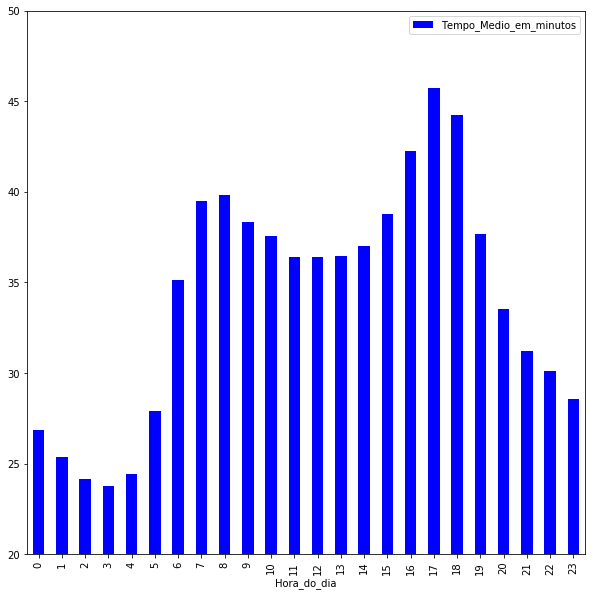

In [80]:
print("Gráficos 1! Tempo Médio em São Paulo por hora do dia")
df = pd.read_sql_query(
    "select hod as Hora_do_dia, avg(mean_travel_time)/60 as Tempo_Medio_em_minutos "+
    "from sao_paulo_hourly "+
    "group by(Hora_do_dia);", conn)
df.plot(x ='Hora_do_dia', y='Tempo_Medio_em_minutos', kind = 'bar', figsize = (10,10), color = 'b', ylim=(20, 50))	

Gráficos 1! Tempo Médio em Manchester por hora do dia


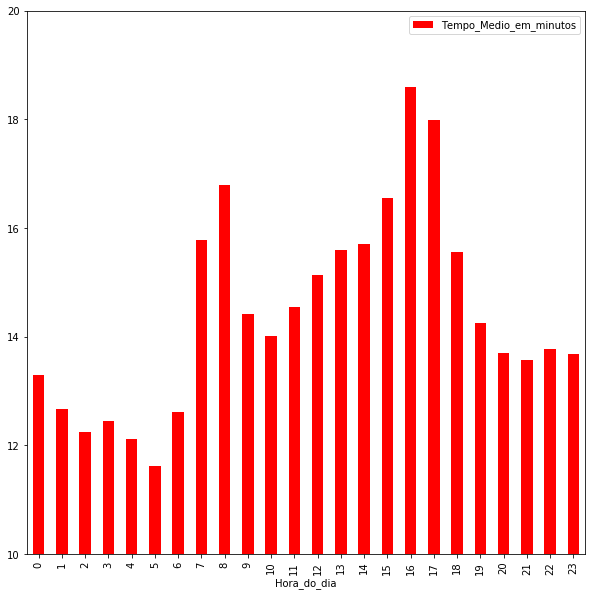

In [75]:
print("Gráficos 2! Tempo Médio em Manchester por hora do dia")
df = pd.read_sql_query(
    "select hod as Hora_do_dia, avg(mean_travel_time)/60 as Tempo_Medio_em_minutos "+
    "from manchester_hourly "+
    "group by(Hora_do_dia);", conn)
df.plot(x ='Hora_do_dia', y='Tempo_Medio_em_minutos', kind = 'bar', figsize = (10,10), color = 'r', ylim=(10, 20))	

Gráficos 3! Tempo Médio em Johannesburgo por hora do dia


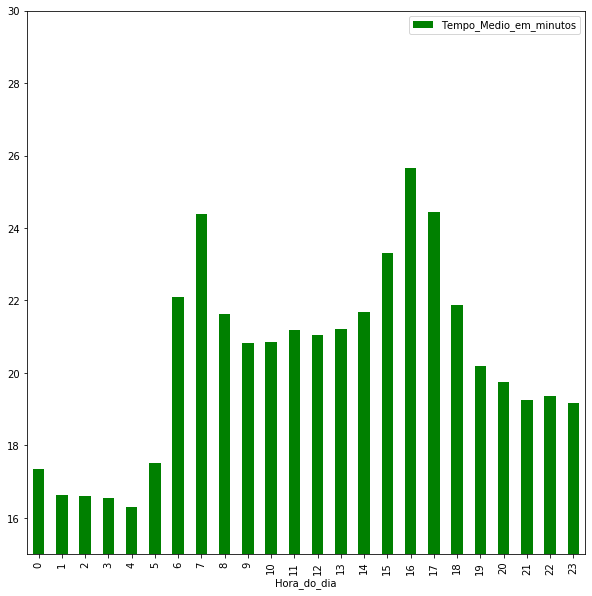

In [84]:
print("Gráficos 3! Tempo Médio em Johannesburgo por hora do dia")
df = pd.read_sql_query(
    "select hod as Hora_do_dia, avg(mean_travel_time)/60 as Tempo_Medio_em_minutos "+
    "from johannesburg_hourly "+
    "group by(Hora_do_dia);", conn)
df.plot(x ='Hora_do_dia', y='Tempo_Medio_em_minutos', kind = 'bar', figsize = (10,10), color = 'g', ylim=(15, 30))	

Gráficos 4! Tempo Médio em Cairo por hora do dia


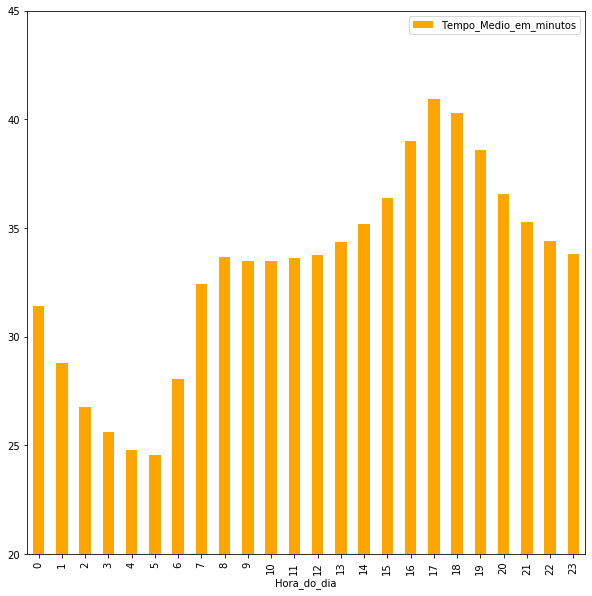

In [89]:
print("Gráficos 4! Tempo Médio em Cairo por hora do dia")
df = pd.read_sql_query(
    "select hod as Hora_do_dia, avg(mean_travel_time)/60 as Tempo_Medio_em_minutos "+
    "from cairo_hourly "+
    "group by(Hora_do_dia);", conn)
df.plot(x ='Hora_do_dia', y='Tempo_Medio_em_minutos', kind = 'bar', figsize = (10,10), color = '#ffa501', ylim=(20, 45))	